# Gross-Pitaevskii equation with magnetism

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 10
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = (x - a/2)^2 + (y - a/2)^2
Apot(x, y, z) = .2 * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
C = 500.0
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.603963e+01     1.333012e+01
 * time: 0.0014829635620117188
     1     3.532150e+01     1.328004e+01
 * time: 0.005628108978271484
     2     2.505253e+01     3.994799e+00
 * time: 0.011667013168334961
     3     2.113370e+01     2.999721e+00
 * time: 0.016885995864868164
     4     1.972780e+01     1.922857e+00
 * time: 0.022310972213745117
     5     1.899753e+01     1.949017e+00
 * time: 0.02698206901550293
     6     1.850153e+01     1.668594e+00
 * time: 0.03162503242492676
     7     1.816346e+01     1.312534e+00
 * time: 0.036073923110961914
     8     1.783153e+01     1.068999e+00
 * time: 0.04077291488647461
     9     1.765182e+01     9.125925e-01
 * time: 0.045797109603881836
    10     1.749101e+01     5.595557e-01
 * time: 0.071929931640625
    11     1.747488e+01     1.720701e+00
 * time: 0.07495808601379395
    12     1.740678e+01     1.208182e+00
 * time: 0.07773303985595703
    13     1.735916e+01     9.956544e-01
 *

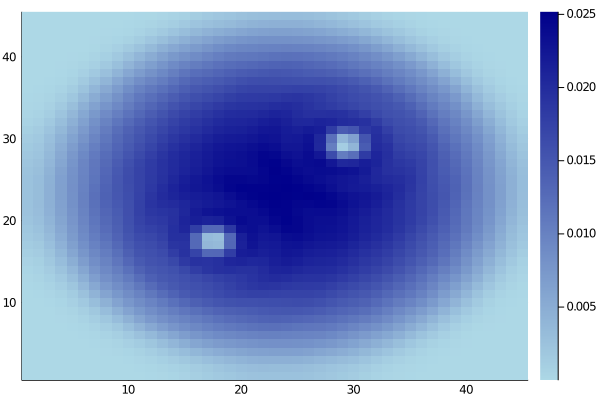

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         PowerNonlinearity(C, α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons=n_electrons,
              terms=terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model, Ecut)
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ.real[:, :, 1], c=:blues)